In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 

In [8]:
#Loading the data 

data = os.listdir(r"../input/digits/digits_jpeg/digits_jpeg" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"../input/digits/digits_jpeg/digits_jpeg" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"../input/digits/digits_jpeg/digits_jpeg" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10160


In [21]:
#Spliting the train validation and test sets

train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [27]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def Prep(img):
    # Step 1: Convert to grayscale if needed
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step 2: Convert to uint8 for equalizeHist
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)

    # Step 3: Histogram Equalization
    img = cv2.equalizeHist(img)

    # Step 4: Normalize to [0, 1] as float32
    img = img.astype('float32') / 255.0

    return img


# === Step 2: Apply preprocessing to your datasets ===
train_X = np.array([Prep(img) for img in train_X])
test_X = np.array([Prep(img) for img in test_X])
valid_X = np.array([Prep(img) for img in valid_X])

# === Step 3: Reshape for CNN input ===
train_X = train_X.reshape(-1, train_X.shape[1], train_X.shape[2], 1)
test_X = test_X.reshape(-1, test_X.shape[1], test_X.shape[2], 1)
valid_X = valid_X.reshape(-1, valid_X.shape[1], valid_X.shape[2], 1)

# === Step 4: Data Augmentation Setup ===
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10
)


In [28]:
# One hot encoding of the labels

train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [29]:
#Creating a Neural Network

model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       960,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,490 (4.13 MB)

 Trainable params: 1,081,490 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Compiling the model

optimizer = RMSprop(rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model

history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 10, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 - 58s - 292ms/step - accuracy: 0.6299 - loss: 1.0550 - val_accuracy: 0.9575 - val_loss: 0.1103
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 - 16s - 80ms/step - accuracy: 0.8810 - loss: 0.3752 - val_accuracy: 0.9684 - val_loss: 0.0902
Epoch 3/10
200/200 - 56s - 281ms/step - accuracy: 0.9123 - loss: 0.2775 - val_accuracy: 0.9829 - val_loss: 0.0493
Epoch 4/10
200/200 - 15s - 76ms/step - accuracy: 0.9256 - loss: 0.2336 - val_accuracy: 0.9767 - val_loss: 0.0608
Epoch 5/10
200/200 - 57s - 284ms/step - accuracy: 0.9395 - loss: 0.1948 - val_accuracy: 0.9788 - val_loss: 0.0624
Epoch 6/10
200/200 - 16s - 80ms/step - accuracy: 0.9501 - loss: 0.1711 - val_accuracy: 0.9808 - val_loss: 0.0557
Epoch 7/10
200/200 - 56s - 279ms/step - accuracy: 0.9548 - loss: 0.1557 - val_accuracy: 0.9881 - val_loss: 0.0324
Epoch 8/10
200/200 - 15s - 76ms/step - accuracy: 0.9531 - loss: 0.1434 - val_accuracy: 0.9891 - val_loss: 0.0263
Epoch 9/10
200/200 - 56s - 280ms/step - accuracy: 0.9606 - loss: 0.1354 - val_accuracy: 0.9855 - val_loss: 0.0612
Epoch 10/10
200/200 - 15s - 77ms/step - accuracy: 0.9583 - loss: 0.1181 - val_accuracy: 0.9886 - val_lo

In [31]:
# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.05223670229315758
Test Accuracy = 0.9803149700164795


_65_8229648.jpeg


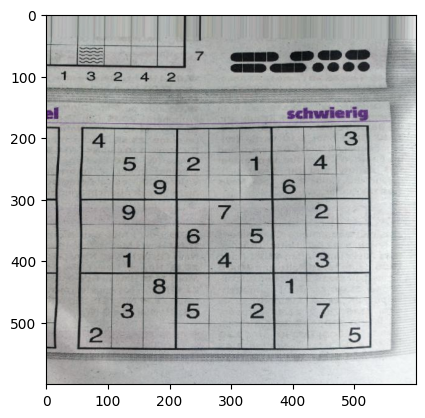

In [32]:
# Randomly select an image from the dataset 

folder=r"../input/sudoku-box-detection/aug"

a=random.choice(os.listdir(folder))
print(a)
sudoku_a = cv2.imread(folder+'/'+a)
plt.figure()
plt.imshow(sudoku_a)
plt.show() 

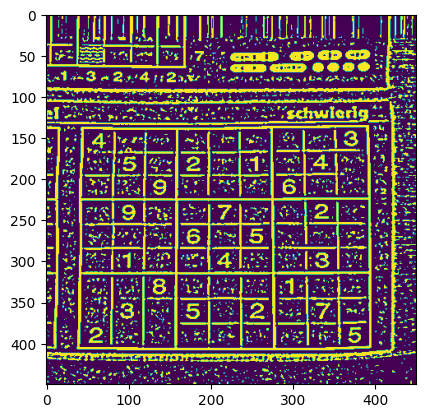

In [33]:
#Preprocessing image to be read
sudoku_a = cv2.resize(sudoku_a, (450,450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)

#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

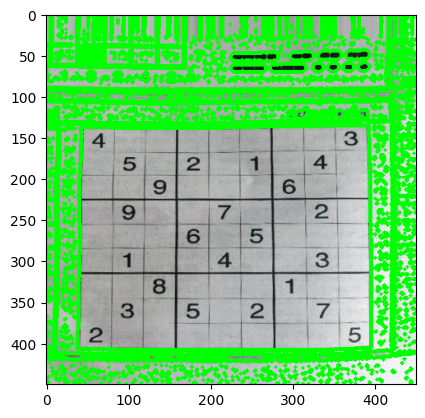

In [34]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)

#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

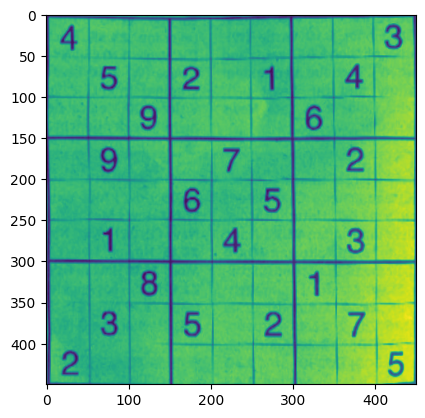

In [35]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

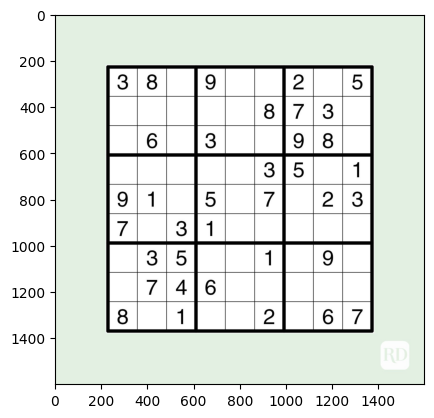

In [36]:
 # Importing puzzle to be solved
puzzle = cv2.imread("../input/su-puzzle/su.jpg")

#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()

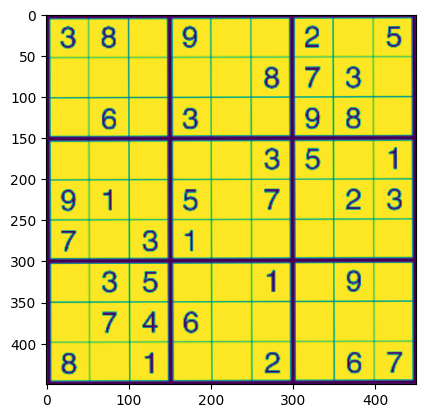

In [37]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))
# Preprocessing Puzzle 
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
    su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

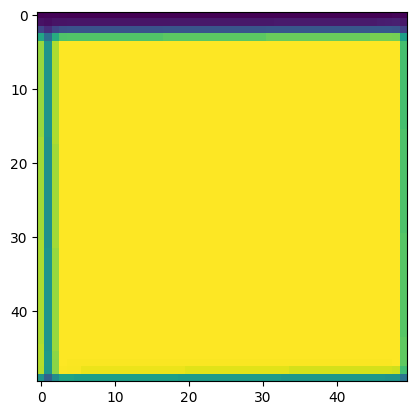

In [38]:
sudoku_cell = splitcells(su_imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[58])
plt.show()

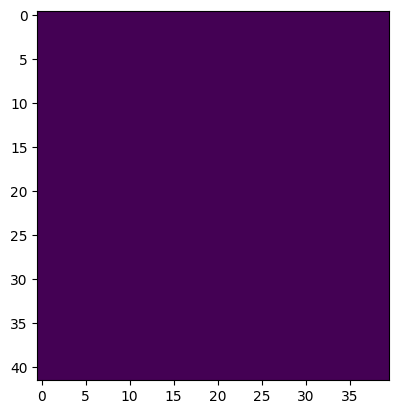

In [39]:
# The sudoku_cell's output includes the boundaries this could lead to misclassifications by the model 
# I am cropping the cells to avoid that
# sneeking in a bit of PIL lib as cv2 was giving some weird error that i couldn't ward off

def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[58])
plt.show()

In [40]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 65% 
        
        predictions = model.predict(img)
        classIndex = np.argmax(predictions, axis=1)
        probabilityValue = np.amax(predictions)
        
        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [41]:
# Reshaping the grid to a 9x9 matrix

grid = np.reshape(grid,(9,9))
grid

array([[3, 8, 0, 9, 0, 0, 2, 0, 5],
       [0, 0, 0, 0, 0, 8, 7, 3, 0],
       [0, 6, 0, 3, 0, 0, 9, 8, 0],
       [0, 0, 0, 0, 0, 3, 5, 0, 1],
       [9, 1, 0, 5, 0, 7, 0, 2, 3],
       [7, 0, 3, 1, 0, 0, 0, 0, 0],
       [0, 3, 5, 0, 0, 1, 0, 9, 0],
       [0, 7, 4, 6, 0, 0, 0, 0, 0],
       [8, 0, 1, 0, 0, 2, 0, 6, 7]])

In [46]:
from ortools.sat.python import cp_model
import numpy as np

def solve_sudoku_with_ortools(grid):
    model = cp_model.CpModel()

    # Define 9x9 matrix of integer variables (1 to 9)
    cell = {}
    for i in range(9):
        for j in range(9):
            cell[i, j] = model.NewIntVar(1, 9, f'cell_{i}_{j}')

    # Add constraints for the known values from the input grid
    for i in range(9):
        for j in range(9):
            if grid[i][j] != 0:
                model.Add(cell[i, j] == grid[i][j])

    # Row constraints
    for i in range(9):
        model.AddAllDifferent([cell[i, j] for j in range(9)])

    # Column constraints
    for j in range(9):
        model.AddAllDifferent([cell[i, j] for i in range(9)])

    # 3x3 subgrid constraints
    for block_i in range(3):
        for block_j in range(3):
            block_cells = []
            for i in range(3):
                for j in range(3):
                    block_cells.append(cell[block_i * 3 + i, block_j * 3 + j])
            model.AddAllDifferent(block_cells)

    # Solve the model
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    # Extract solution
    if status == cp_model.FEASIBLE or status == cp_model.OPTIMAL:
        solved_grid = np.zeros((9, 9), dtype=int)
        for i in range(9):
            for j in range(9):
                solved_grid[i][j] = solver.Value(cell[i, j])
        return solved_grid
    else:
        print("No solution found.")
        return None

solved_grid = solve_sudoku_with_ortools(grid)
# print(solved_grid)


In [47]:
def print_grid(grid):
    for row in range(9):
        if row % 3 == 0 and row != 0:
            print("....................")
        for col in range(9):
            if col % 3 == 0 and col != 0:
                print("|", end=" ")
            if col == 8:
                print(grid[row][col])
            else:
                print(str(grid[row][col]) + " ", end="")

In [48]:


if solved_grid is not None:
    print_grid(solved_grid)
else:
    print("No valid solution found.")


3 8 7 | 9 6 4 | 2 1 5
5 4 9 | 2 1 8 | 7 3 6
1 6 2 | 3 7 5 | 9 8 4
....................
4 2 6 | 8 9 3 | 5 7 1
9 1 8 | 5 4 7 | 6 2 3
7 5 3 | 1 2 6 | 8 4 9
....................
6 3 5 | 7 8 1 | 4 9 2
2 7 4 | 6 3 9 | 1 5 8
8 9 1 | 4 5 2 | 3 6 7
